# Data Cleaning

## Checking Duplicates, Data Types, and Sanity Checks

This notebook performs:
1. **Duplicate Detection** - Check for duplicate user IDs and items
2. **Data Type Validation** - Verify all values are integers
3. **Sanity Checks** - Statistical analysis using describe()
4. **Data Integrity** - Check for missing values, invalid entries


## 1. Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Data

In [8]:
def load_data(filepath):
    """Load user-item interaction data"""
    user_items = []
    all_items = []
    user_ids = []
    
    with open(filepath, 'r') as f:
        for line_num, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                continue
            items = line.split()
            if len(items) < 2:
                print(f"Warning: Line {line_num} has less than 2 items")
                continue
            
            user_id = int(items[0])
            item_list = [int(x) for x in items[1:]]
            
            user_ids.append(user_id)
            user_items.append((user_id, item_list))
            all_items.extend(item_list)
    
    return user_items, user_ids, all_items

print("Loading train-2-interim.txt...")
user_items, user_ids, all_items = load_data(r'interim_data\train-2-interim.txt')
print(f"Loaded {len(user_items):,} users")
print(f"Total interactions: {len(all_items):,}")

Loading train-2-interim.txt...
Loaded 51,420 users
Total interactions: 1,961,174


## 3. Check for Duplicate User IDs

In [11]:
print("CHECKING FOR DUPLICATE USER IDs")
print("="*70)

# Count occurrences of each user ID
user_id_counts = Counter(user_ids)
duplicates = {uid: count for uid, count in user_id_counts.items() if count > 1}

print(f"\nTotal User IDs: {len(user_ids):,}")
print(f"Unique User IDs: {len(user_id_counts):,}")
print(f"Duplicate User IDs: {len(duplicates):,}")

if duplicates:
    print(f"\n WARNING: Found {len(duplicates)} duplicate user IDs!")
    print("\nFirst 10 duplicates:")
    for uid, count in list(duplicates.items())[:10]:
        print(f"  User ID {uid}: appears {count} times")
else:
    print("\n No duplicate user IDs found!")
    print(" Each user appears exactly once in the dataset.")

CHECKING FOR DUPLICATE USER IDs

Total User IDs: 51,420
Unique User IDs: 51,420
Duplicate User IDs: 0

 No duplicate user IDs found!
 Each user appears exactly once in the dataset.


## 4. Check for Duplicate Items within Each User

In [14]:
print("CHECKING FOR DUPLICATE ITEMS WITHIN USERS")
print("="*70)

users_with_duplicates = []
total_duplicate_items = 0

for uid, items in user_items:
    item_counts = Counter(items)
    duplicates_in_user = {item: count for item, count in item_counts.items() if count > 1}
    
    if duplicates_in_user:
        users_with_duplicates.append((uid, duplicates_in_user))
        total_duplicate_items += sum(count - 1 for count in duplicates_in_user.values())

print(f"\nUsers with duplicate items: {len(users_with_duplicates):,}")
print(f"Total duplicate item entries: {total_duplicate_items:,}")

if users_with_duplicates:
    print(f"\n WARNING: Found {len(users_with_duplicates)} users with duplicate items!")
    print("\nFirst 10 examples:")
    for uid, dups in users_with_duplicates[:10]:
        print(f"  User {uid}: {len(dups)} duplicate items")
        for item, count in list(dups.items())[:3]:
            print(f"    - Item {item} appears {count} times")
else:
    print("\n No duplicate items within users!")
    print(" Each user has unique items only.")

CHECKING FOR DUPLICATE ITEMS WITHIN USERS

Users with duplicate items: 0
Total duplicate item entries: 0

 No duplicate items within users!
 Each user has unique items only.


## 5. Data Type Validation

In [19]:
print("DATA TYPE VALIDATION")
print("="*70)

# Check if all user IDs are integers
all_user_ids_int = all(isinstance(uid, int) for uid in user_ids)
print(f"\n All User IDs are integers: {all_user_ids_int}")

# Check if all items are integers
all_items_int = all(isinstance(item, int) for item in all_items)
print(f" All Items are integers: {all_items_int}")

# Check for negative values
negative_users = [uid for uid in user_ids if uid < 0]
negative_items = [item for item in all_items if item < 0]

print(f"\nNegative User IDs: {len(negative_users)}")
print(f"Negative Item IDs: {len(negative_items)}")

if negative_users or negative_items:
    print("\n WARNING: Found negative IDs!")
else:
    print("\n All IDs are non-negative integers!")

# Check data types summary
print(f"\nData Type Summary:")
print(f"  User IDs: {type(user_ids[0]).__name__}")
print(f"  Item IDs: {type(all_items[0]).__name__}")

DATA TYPE VALIDATION

 All User IDs are integers: True
 All Items are integers: True

Negative User IDs: 0
Negative Item IDs: 0

 All IDs are non-negative integers!

Data Type Summary:
  User IDs: int
  Item IDs: int


## 6. Create DataFrames for Describe Analysis

In [22]:
print("CREATING DATAFRAMES FOR ANALYSIS")
print("="*70)

# Create user-level DataFrame
user_df = pd.DataFrame({
    'UserID': user_ids,
    'InteractionCount': [len(items) for _, items in user_items],
    'MinItemID': [min(items) if items else None for _, items in user_items],
    'MaxItemID': [max(items) if items else None for _, items in user_items],
    'UniqueItems': [len(set(items)) for _, items in user_items]
})

print(f"\n User DataFrame created: {user_df.shape[0]:,} rows × {user_df.shape[1]} columns")

# Create item-level DataFrame
item_frequency = Counter(all_items)
item_df = pd.DataFrame([
    {'ItemID': item, 'Frequency': freq}
    for item, freq in item_frequency.items()
])

print(f" Item DataFrame created: {item_df.shape[0]:,} rows × {item_df.shape[1]} columns")

# Show first few rows
print("\n User DataFrame - First 5 rows:")
print(user_df.head())

print("\n Item DataFrame - First 5 rows:")
print(item_df.head())

CREATING DATAFRAMES FOR ANALYSIS

 User DataFrame created: 51,420 rows × 5 columns
 Item DataFrame created: 91,522 rows × 2 columns

 User DataFrame - First 5 rows:
   UserID  InteractionCount  MinItemID  MaxItemID  UniqueItems
0       0                17         16      29781           17
1       1                19       7554      39108           19
2       2                19        385      42167           19
3       3                16        784      40368           16
4       4                16        533      34962           16

 Item DataFrame - First 5 rows:
   ItemID  Frequency
0   28261         22
1     388        100
2    5731         80
3     401        178
4   28284         20


## 7. Describe - User Statistics

In [27]:
print("USER STATISTICS - DESCRIBE()")
print("="*70)
print("\nUser DataFrame Statistics:\n")
print(user_df.describe())

print("\n" + "="*70)
print("\nAdditional User Metrics:")
print(f"  Total Users: {len(user_df):,}")
print(f"  User ID Range: {user_df['UserID'].min()} to {user_df['UserID'].max():,}")
print(f"  Avg Interactions per User: {user_df['InteractionCount'].mean():.2f}")
print(f"  Median Interactions: {user_df['InteractionCount'].median():.2f}")
print(f"  Std Dev Interactions: {user_df['InteractionCount'].std():.2f}")

USER STATISTICS - DESCRIBE()

User DataFrame Statistics:

             UserID  InteractionCount     MinItemID     MaxItemID  \
count  51420.000000      51420.000000  51420.000000  51420.000000   
mean   26541.505834         38.140296   9678.038176  70883.250272   
std    15165.351988         31.124100  13017.772442  17593.828020   
min        0.000000         16.000000      6.000000     58.000000   
25%    13427.750000         19.000000    555.000000  57382.750000   
50%    26632.500000         26.000000   3308.000000  77394.000000   
75%    39684.250000         44.000000  14468.000000  85585.250000   
max    52642.000000        200.000000  88417.000000  91604.000000   

        UniqueItems  
count  51420.000000  
mean      38.140296  
std       31.124100  
min       16.000000  
25%       19.000000  
50%       26.000000  
75%       44.000000  
max      200.000000  


Additional User Metrics:
  Total Users: 51,420
  User ID Range: 0 to 52,642
  Avg Interactions per User: 38.14
  Median 

## 8. Describe - Item Statistics

In [30]:
print("ITEM STATISTICS - DESCRIBE()")
print("="*70)
print("\nItem DataFrame Statistics:\n")
print(item_df.describe())

print("\n" + "="*70)
print("\nAdditional Item Metrics:")
print(f"  Total Unique Items: {len(item_df):,}")
print(f"  Item ID Range: {item_df['ItemID'].min()} to {item_df['ItemID'].max():,}")
print(f"  Avg Frequency per Item: {item_df['Frequency'].mean():.2f}")
print(f"  Median Frequency: {item_df['Frequency'].median():.2f}")
print(f"  Most Popular Item: ID {item_df.loc[item_df['Frequency'].idxmax(), 'ItemID']} ({item_df['Frequency'].max():,} interactions)")
print(f"  Least Popular Item: ID {item_df.loc[item_df['Frequency'].idxmin(), 'ItemID']} ({item_df['Frequency'].min()} interactions)")

ITEM STATISTICS - DESCRIBE()

Item DataFrame Statistics:

             ItemID     Frequency
count  91522.000000  91522.000000
mean   45793.427362     21.428443
std    26440.259434     33.938295
min        6.000000      1.000000
25%    22890.250000      8.000000
50%    45795.500000     12.000000
75%    68691.750000     23.000000
max    91604.000000   1556.000000


Additional Item Metrics:
  Total Unique Items: 91,522
  Item ID Range: 6 to 91,604
  Avg Frequency per Item: 21.43
  Median Frequency: 12.00
  Most Popular Item: ID 896 (1,556 interactions)
  Least Popular Item: ID 7934 (1 interactions)


## 9. Check for Missing or Invalid Values

In [33]:
print("MISSING & INVALID VALUE CHECK")
print("="*70)

# Check for NaN values in DataFrames
print("\nUser DataFrame - Missing Values:")
print(user_df.isnull().sum())

print("\nItem DataFrame - Missing Values:")
print(item_df.isnull().sum())

# Check for zero IDs
zero_users = user_df[user_df['UserID'] == 0]
zero_items = item_df[item_df['ItemID'] == 0]

print(f"\nUsers with ID = 0: {len(zero_users)}")
print(f"Items with ID = 0: {len(zero_items)}")

# Check for users with no interactions
empty_users = user_df[user_df['InteractionCount'] == 0]
print(f"\nUsers with 0 interactions: {len(empty_users)}")

if user_df.isnull().sum().sum() == 0 and item_df.isnull().sum().sum() == 0:
    print("\n No missing values found")
else:
    print("\n Missing values found")

MISSING & INVALID VALUE CHECK

User DataFrame - Missing Values:
UserID              0
InteractionCount    0
MinItemID           0
MaxItemID           0
UniqueItems         0
dtype: int64

Item DataFrame - Missing Values:
ItemID       0
Frequency    0
dtype: int64

Users with ID = 0: 1
Items with ID = 0: 0

Users with 0 interactions: 0

 No missing values found


## 10. Check Item ID Consistency

In [36]:
print("ITEM ID CONSISTENCY CHECK")
print("="*70)

# Check if ItemID range has gaps
min_item = item_df['ItemID'].min()
max_item = item_df['ItemID'].max()
expected_count = max_item - min_item + 1
actual_count = len(item_df)

print(f"\nItem ID Range: {min_item} to {max_item:,}")
print(f"Expected Items (if sequential): {expected_count:,}")
print(f"Actual Unique Items: {actual_count:,}")
print(f"Missing IDs: {expected_count - actual_count:,}")

if expected_count == actual_count:
    print("\n Item IDs are sequential with no gaps!")
else:
    gap_percentage = ((expected_count - actual_count) / expected_count) * 100
    print(f"\n Item IDs have gaps ({gap_percentage:.2f}% missing)")
    
    # Find some missing IDs
    all_item_ids = set(item_df['ItemID'])
    missing_ids = [i for i in range(min_item, min(min_item + 100, max_item)) if i not in all_item_ids]
    if missing_ids:
        print(f"\n First 10 missing IDs: {missing_ids[:10]}")

ITEM ID CONSISTENCY CHECK

Item ID Range: 6 to 91,604
Expected Items (if sequential): 91,599
Actual Unique Items: 91,522
Missing IDs: 77

 Item IDs have gaps (0.08% missing)


## 11. Visualizations - Data Quality

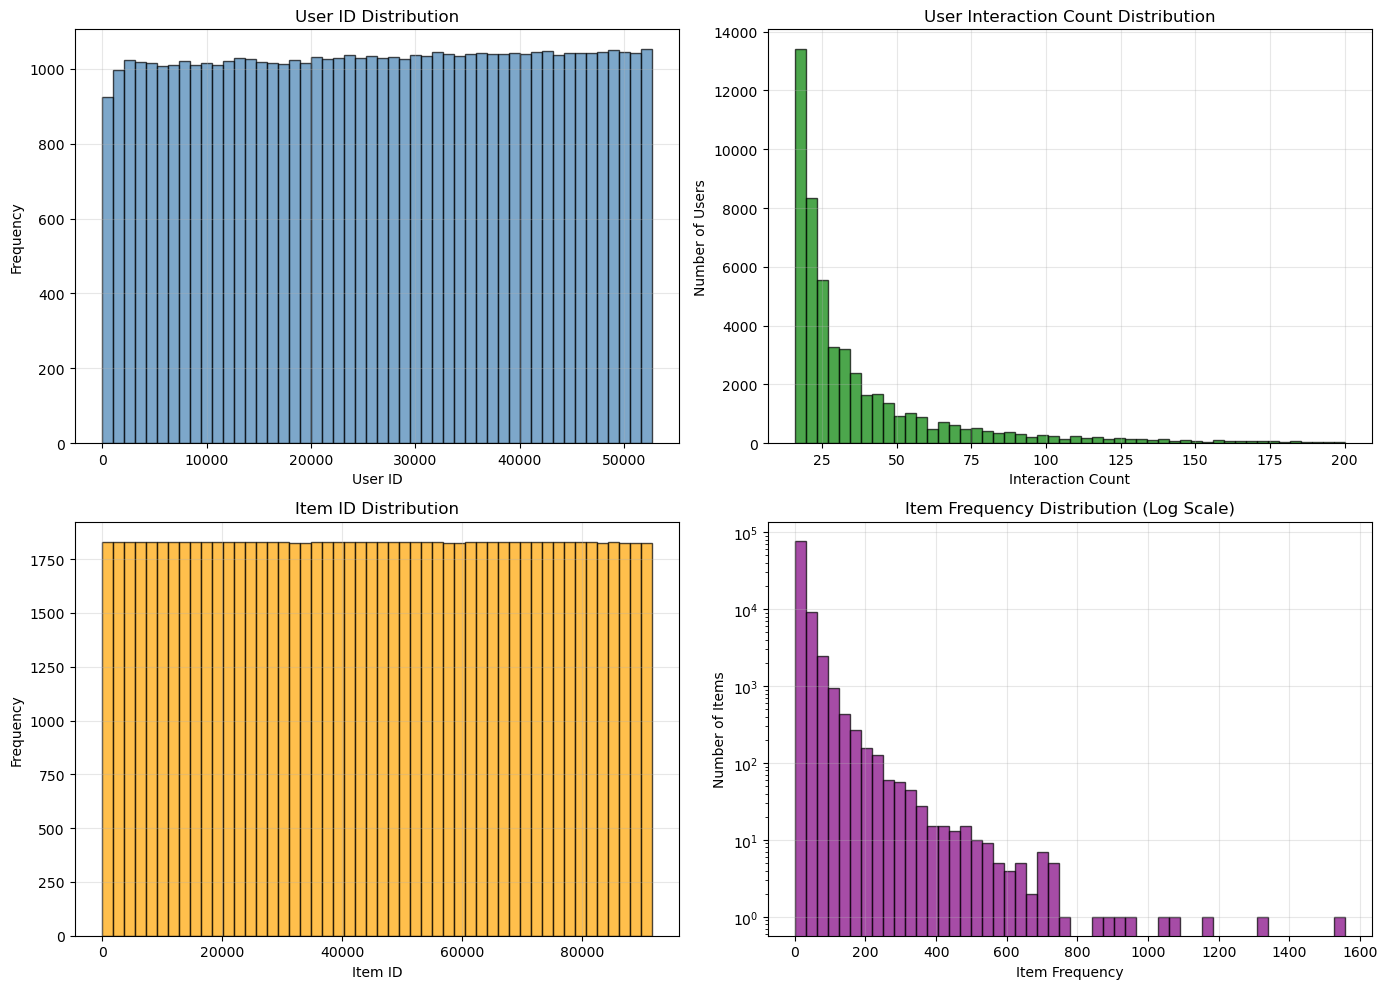

In [39]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: User ID distribution
axes[0, 0].hist(user_df['UserID'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('User ID')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('User ID Distribution')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Interaction count distribution
axes[0, 1].hist(user_df['InteractionCount'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_xlabel('Interaction Count')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].set_title('User Interaction Count Distribution')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Item ID distribution
axes[1, 0].hist(item_df['ItemID'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Item ID')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Item ID Distribution')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Item frequency distribution (log scale)
axes[1, 1].hist(item_df['Frequency'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Item Frequency')
axes[1, 1].set_ylabel('Number of Items')
axes[1, 1].set_title('Item Frequency Distribution (Log Scale)')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('data_quality_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()